In [7]:
import pandas as pd
import pymysql
import matplotlib.pyplot as plt

HOST, ADMIN, PASS, DB =  'mivo-db.cj2ucwgierrs.us-east-1.rds.amazonaws.com', 'admin', '58#64KDashz^bLrqTG2', 'mivo'

In [ ]:
import pandas as pd

dtype_spec = {
    'Tipo': 'int',
    'Numero': 'int',
    'Lin': 'int',
    'C.Bod': 'int',
    'Cant': 'int',
    'Venta': 'int',
    'Costo': 'int',
    'Margen': 'int',
    'Jerarquia': str,
    'Sub Jerarquia': str,
    'Local': str,
    'Color': str,
    'talla': str,
    'Marca': str,
    'temporada': str,
    'Rut': str,
    'Cliente': str
}
df = pd.read_csv('Ventas.csv', usecols=list(dtype_spec.keys()) + ['Fecha'], dtype=dtype_spec)
df['Fecha'] = pd.to_datetime(df['Fecha'], format='%Y%m%d')

In [ ]:
df['Local'].value_counts()

In [ ]:
flujo = pd.read_csv('Flujo.csv')
flujo['FECHA'] = pd.to_datetime(flujo['FECHA'], format='%m/%d/%Y')
flujo['Total Visitas'] = flujo.iloc[:, 2:26].sum(axis=1)
flujoSimple = flujo[['FECHA','ENTRADA', 'Total Visitas']]
flujoSimple.head()

In [ ]:
# Define data types for the hourly columns from 00 to 23
hour_columns_dtypes = {f"{hour:02}": int for hour in range(24)}

# 'ENTRADA' is specified as a string
dtype_dict = {
    'ENTRADA': str,
    **hour_columns_dtypes  # Merge the dictionary with hourly data types
}

# Load the CSV file with defined data types and specify 'FECHA' as a date column
traffic_df = pd.read_csv('Flujo.csv', dtype=dtype_dict, parse_dates=['FECHA'])

# Display the first few entries to check data loading
print(traffic_df.head())

# Check the data types to confirm proper loading and type assignment
#print(traffic_df.dtypes)

In [ ]:
import pandas as pd

# Assuming 'df' is already loaded and contains your sales data

# Ensure 'Fecha' is a datetime type for proper grouping
df['Fecha'] = pd.to_datetime(df['Fecha'])

# Group by 'Fecha' and 'Local', and count distinct 'Numero'
daily_sales = df.groupby(['Fecha', 'Local']).agg(purchases=('Numero', 'nunique')).reset_index()

# Display the resulting DataFrame
print(daily_sales)

In [ ]:
visits = pd.DataFrame(flujoSimple)
sales = pd.DataFrame(daily_sales)

# Normalize the date columns
visits['FECHA'] = pd.to_datetime(visits['FECHA'])
sales['Fecha'] = pd.to_datetime(sales['Fecha'])


# Normalize the local/entrada names to lowercase
visits['ENTRADA'] = visits['ENTRADA'].astype(str).str.lower().str.strip()
sales['Local'] = sales['Local'].astype(str).str.lower().str.strip()

# Rename columns for consistency
visits.rename(columns={'FECHA': 'date', 'ENTRADA': 'local'}, inplace=True)
sales.rename(columns={'Fecha': 'date', 'Local': 'local'}, inplace=True)

# Merge DataFrames
result = pd.merge(visits, sales, on=['date', 'local'], how='inner')
result['conversion_rate'] = result['purchases'] / result['Total Visitas'] * 100
result.head()

### Conversion

In [ ]:
import pandas as pd
dtype_spec = {
    'Tipo': 'int',
    'Numero': 'int',
    'Lin': 'int',
    'C.Bod': 'int',
    'Cant': 'int',
    'Venta': 'int',
    'Costo': 'int',
    'Margen': 'int',
    'Jerarquia': str,
    'Sub Jerarquia': str,
    'Local': str,
    'Color': str,
    'talla': str,
    'Marca': str,
    'temporada': str,
    'Rut': str,
    'Cliente': str
}
ventas = pd.read_csv('Ventas.csv', usecols=list(dtype_spec.keys()) + ['Fecha'], dtype=dtype_spec)
ventas['Fecha'] = pd.to_datetime(ventas['Fecha'], format='%Y%m%d')
daily_sales = ventas.groupby(['Fecha', 'Local']).agg(purchases=('Numero', 'nunique')).reset_index()
# clients_sales = ventas.groupby(['Cliente']).agg(
#     Total_Venta=('Venta', 'sum'),
#     Item_Count=('Numero', 'nunique'),
#     ).reset_index()


flujo = pd.read_csv('Flujo.csv')
flujo['FECHA'] = pd.to_datetime(flujo['FECHA'], format='%m/%d/%Y')
flujo['Total Visitas'] = flujo.iloc[:, 2:26].sum(axis=1)
flujoSimple = flujo[['FECHA','ENTRADA', 'Total Visitas']]

visits = pd.DataFrame(flujoSimple)
sales = pd.DataFrame(daily_sales)

# Normalize the date columns
visits['FECHA'] = pd.to_datetime(visits['FECHA'])
sales['Fecha'] = pd.to_datetime(sales['Fecha'])


# Normalize the local/entrada names to lowercase
visits['ENTRADA'] = visits['ENTRADA'].astype(str).str.lower().str.strip()
sales['Local'] = sales['Local'].astype(str).str.lower().str.strip()

# Rename columns for consistency
visits.rename(columns={'FECHA': 'date', 'ENTRADA': 'local'}, inplace=True)
sales.rename(columns={'Fecha': 'date', 'Local': 'local'}, inplace=True)

# Merge DataFrames
result = pd.merge(visits, sales, on=['date', 'local'], how='inner')
result['conversion_rate'] = result['purchases'] / result['Total Visitas'] * 100
result.head()

### Insert sales to DB [WORKING]

In [ ]:
import pandas as pd
import pymysql

dtype_spec = {
    'Tipo': 'int',
    'Numero': 'int',
    'Lin': 'int',
    'C.Bod': 'int',
    'Cant': 'int',
    'Venta': 'int',
    'Costo': 'int',
    'Margen': 'int',
    'Jerarquia': str,
    'Sub Jerarquia': str,
    'Local': str,
    'Color': str,
    'talla': str,
    'Marca': str,
    'temporada': str,
    'Rut': str,
    'Cliente': str
}
ventas = pd.read_csv('Ventas.csv', usecols=list(dtype_spec.keys()) + ['Fecha'], dtype=dtype_spec)
ventas['Fecha'] = pd.to_datetime(ventas['Fecha'], format='%Y%m%d')
daily_sales = ventas.groupby(['Fecha', 'Local']).agg(purchases=('Numero', 'nunique')).reset_index()


sales = pd.DataFrame(daily_sales)


## Only some stores
salesFiltered = pd.DataFrame(sales)

# Mapping dictionary
local_map = {
    'concepcion': 1,
    'santos dumontt': 2,
    'mall tobalaba pte.alto': 3,
    'mall quilin': 4
}

# Apply the map to the 'local' column
salesFiltered['store_id'] = salesFiltered['local'].map(local_map).astype('Int64')

# Filter out rows where 'mapped_value' is None
filtered_sales = salesFiltered.dropna(subset=['store_id'])

# Print the filtered DataFrame
filtered_sales.head()



conn = pymysql.connect(host=HOST, user=ADMIN, password=PASS, database=DB)
cursor = conn.cursor()

insert_query = """
INSERT INTO sales (purchases, date, store_id)
VALUES (%s, %s, %s);
"""

# Iterate over DataFrame rows
for index, row in filtered_sales.iterrows():
    # Here you might add checks or transformations if needed
    # Prepare data for insertion
    data_to_insert = (row['purchases'], row['date'], row['store_id'])
    
    # Execute the SQL command
    try:
        cursor.execute(insert_query, data_to_insert)
        conn.commit()  # Commit changes for the current row only
    except pymysql.Error as e:
        print(f"Error on row {index}: {e}")
        conn.rollback()  # Roll back the current row insertion only
        continue  # Continue with the next row

# Close the connection
cursor.close()
conn.close()

### Insert visits-flujo to DB [Working]

In [5]:
tobalaba = pd.read_csv('tobalaba_flujo.csv')
conce = pd.read_csv('conce_flujo.csv')
quilin = pd.read_csv('quilin_flujo.csv')

df_panoramico = pd.read_excel('/home/diego/Downloads/vivo_panomarico.xls', skiprows=4)
df_plaza_los_rios = pd.read_excel('/home/diego/Downloads/plaza_los_rios.xls', skiprows=4)
df_estado = pd.read_excel('/home/diego/Downloads/estado.xls', skiprows=4)
df_apumanque = pd.read_excel('/home/diego/Downloads/apumanque.xls', skiprows=4)

df_panoramico['FECHA'] = pd.to_datetime(df_panoramico['FECHA'], format='%Y-%m-%d')
df_plaza_los_rios['FECHA'] = pd.to_datetime(df_plaza_los_rios['FECHA'], format='%Y-%m-%d')
df_estado['FECHA'] = pd.to_datetime(df_estado['FECHA'], format='%Y-%m-%d')
df_apumanque['FECHA'] = pd.to_datetime(df_apumanque['FECHA'], format='%Y-%m-%d')

df_panoramico['store_id'] = 11
df_plaza_los_rios['store_id'] = 9
df_estado['store_id'] = 12
df_apumanque['store_id'] = 10


total_visits = pd.concat([df_panoramico, df_plaza_los_rios, df_estado, df_apumanque], ignore_index=True)

# Connect to the database
conn = pymysql.connect(host=HOST, user=ADMIN, password=PASS, database=DB)
cursor = conn.cursor()

# SQL Insert Statement
insert_query = """
INSERT INTO visits (count, time, date, store_id)
VALUES (%s, %s, %s, %s);
"""

# Prepare data for insertion
data_to_insert = []
for index, row in total_visits.iterrows():
    date = pd.to_datetime(row['FECHA']).date()  # Ensuring date is in proper format
    store_id = row['store_id']
    for hour in range(24):
        hour_key = f'{hour:02}'  # Format hour as two digits
        count = row[hour_key]
        if count > 0:
            time = f'{hour_key}:00:00'  # Format time as HH:MM:SS
            data_to_insert.append((count, time, date, store_id))

# Insert data in chunks of 1000
chunk_size = 1000
for i in range(0, len(data_to_insert), chunk_size):
    chunk = data_to_insert[i:i + chunk_size]
    try:
        cursor.executemany(insert_query, chunk)
        conn.commit()
    except pymysql.Error as e:
        print(f"Error inserting data: {e}")
        conn.rollback()  # Roll back the transaction

# Close the connection
cursor.close()
conn.close()

/home/diego/miniconda3/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/home/diego/miniconda3/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/home/diego/miniconda3/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/home/diego/miniconda3/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


### Sales per category Load Sales Data

In [21]:
import pandas as pd
import numpy as np
def load_sales_data():
	#### LODAD DATA ####
	dtype_spec = {
		'Tipo': 'int',
		'Numero': 'int',
		'Lin': 'int',
		'C.Bod': 'int',
		'Cant': 'int',
		'Venta': 'int',
		'Costo': 'int',
		'Margen': 'int',
		'Jerarquia': str,
		'Sub Jerarquia': str,
		'Local': str,
		'Color': str,
		'talla': str,
		'Marca': str,
		'temporada': str,
		'Rut': str,
		'Cliente': str
	}
	# Assuming 'df' is your DataFrame already loaded with the data
	sales_df = pd.read_csv('Ventas.csv', usecols=list(dtype_spec.keys()) + ['Fecha'], dtype=dtype_spec)
	sales_df['Fecha'] = pd.to_datetime(sales_df['Fecha'], format='%Y%m%d')
	# Define conditions
	conditions = [
		sales_df['Local'].str.strip().isin(['INTERNET']),  # Internet category
		sales_df['Local'].str.strip().isin(['BODEGA DOMINICA','BODEGA LDP', 'MAYORISTA', 'DARDIGNAC', 'BUENOS AIRES', 'SANTOS DUMONTT']),  # Mayoristas category
		sales_df['Local'].str.strip().isin(['CONCEPCION', 'VALDIVIA', 'MALL TOBALABA PTE.ALTO', 'APUMANQUE', 'PROVIDENCIA', 'ESTADO', 'MALL QUILIN'])  # No mayoristas category
	]

	choices = [
		'Internet',  # Choice for Internet
		'Mayoristas',  # Choice for Mayoristas
		'No mayoristas'  # Choice for No mayoristas
	]

	sales_df['categories'] = np.select(conditions, choices, default='No mayoristas')  # Default can be adjusted if needed

	store_dict = {
		'CONCEPCION': 1,
		'SANTOS DUMONTT': 2,
		'MALL TOBALABA PTE.ALTO': 3,
		'MALL QUILIN': 4,
		'INTERNET': 5,
		'DARDIGNAC': 6,
		'BUENOS AIRES': 7,
		'BODEGA LDP': 8,
		'VALDIVIA': 9,
		'APUMANQUE': 10,
		'PROVIDENCIA': 11,
		'ESTADO': 12,
		'MAYORISTA': 13,
		'BODEGA DOMINICA': 14
	}

	sales_df['store_id'] = sales_df['Local'].str.strip().map(store_dict).astype('Int64')
	sales_df['Fecha_Year_Month'] = sales_df['Fecha'].dt.to_period('M')

#### LODAD DATA ####


### Insert into Sales_agg [Working]

In [ ]:
sales_df = load_sales_data()

category_sales = sales_df.groupby(['Local', 'Fecha_Year_Month']).agg(
    total_sales=('Venta', 'sum'),                # Sum of the 'Venta' column for total sales
    total_margin=('Margen', 'sum'),             # Sum of the 'Margen' column for total margins
    count_items=('Numero', 'count'),            # Count of all occurrences of 'Numero'
    unique_sales=('Numero', 'nunique'),         # Count of unique 'Numero' values
    category=('categories', 'first')            # Get the first category value
).reset_index()

# Calculate 'Average Items per Transaction' by dividing the count of items by the count of unique sales
category_sales['Average Items per Transaction'] = category_sales['count_items'] / category_sales['unique_sales']

# Optionally, round the 'Average Items per Transaction' to a sensible number of decimal places, e.g., 2
category_sales['Average Items per Transaction'] = category_sales['Average Items per Transaction'].round(2)

# Sort the resulting DataFrame by 'total_sales' if needed
category_sales_sorted = category_sales.sort_values(by='total_sales', ascending=False)

# Display the top 100 entries in the DataFrame
category_sales_sorted.head(n=1000)


store_dict = {
    'CONCEPCION': 1,
    'SANTOS DUMONTT': 2,
    'MALL TOBALABA PTE.ALTO': 3,
    'MALL QUILIN': 4,
    'INTERNET': 5,
    'DARDIGNAC': 6,
    'BUENOS AIRES': 7,
    'BODEGA LDP': 8,
    'VALDIVIA': 9,
    'APUMANQUE': 10,
    'PROVIDENCIA': 11,
    'ESTADO': 12,
    'MAYORISTA': 13,
    'BODEGA DOMINICA': 14
}

conn = pymysql.connect(host=HOST, user=ADMIN, password=PASS, database=DB)
cursor = conn.cursor()

# SQL Insert Statement
insert_query = """
INSERT INTO sales_agg (date, store_id, total_sales, total_margin, count_items, unique_sales) VALUES (%s, %s, %s, %s, %s, %s);
"""

# Iterate over DataFrame rows
for index, row in category_sales_sorted.iterrows():
    # Prepare data for insertion
    if row['store_id'] is None:
        print(f"Store ID not found for '{row['Local']}'")
        continue

    # Assuming store_id is correctly assigned before this line as your example did not clarify where it comes from
    store_id = row['store_id']

    data_to_insert = (f"{row['Fecha_Year_Month']}-01", store_id, row['total_sales'], row['total_margin'], row['count_items'], row['unique_sales'])
    
    # Execute the SQL command
    try:
        cursor.execute(insert_query, data_to_insert)
        conn.commit()  # Commit changes for the current row only
    except pymysql.Error as e:
        print(f"Error on row {index}: {e}")
        conn.rollback()  # Roll back the current row insertion only
        continue  # Continue with the next row


# Close the connection
cursor.close()
conn.close()

### Insert into sales Agg per Day [Working]

In [36]:
sales_df = load_sales_data()

sales_agg_per_day = sales_df.groupby(['Local', 'Fecha']).agg(
    total_sales=('Venta', 'sum'),                # Sum of the 'Venta' column for total sales
    total_margin=('Margen', 'sum'),             # Sum of the 'Margen' column for total margins
    count_items=('Numero', 'count'),            # Count of all occurrences of 'Numero'
    unique_sales=('Numero', 'nunique'),         # Count of unique 'Numero' values
    category=('categories', 'first'),          # Get the first category value
    store_id=('store_id', 'first'),          # Get the first category value
).reset_index()

conn = pymysql.connect(host=HOST, user=ADMIN, password=PASS, database=DB)
cursor = conn.cursor()

# SQL Insert Statement
insert_query = """
INSERT INTO sales (date, store_id, total_sales, total_margin, count_items, unique_sales) VALUES (%s, %s, %s, %s, %s, %s);
"""

# Prepare data for insertion
data_to_insert = []
for index, row in sales_agg_per_day.iterrows():
    if row['store_id'] is None:
        print(f"Store ID not found for '{row['Local']}'")
        continue

    # Assuming store_id is correctly assigned before this line as your example did not clarify where it comes from
    store_id = row['store_id']
    data_to_insert.append((row['Fecha'], store_id, row['total_sales'], row['total_margin'], row['count_items'], row['unique_sales']))

# Insert data in chunks
chunk_size = 1000  # Define the size of each chunk
for i in range(0, len(data_to_insert), chunk_size):
    chunk = data_to_insert[i:i + chunk_size]
    try:
        cursor.executemany(insert_query, chunk)
        conn.commit()
    except pymysql.Error as e:
        print(f"Error inserting data: {e}")
        conn.rollback()  # Roll back the transaction if an error occurs

# Close the connection
cursor.close()
conn.close()

### Comparacion Flujo 

/home/diego/miniconda3/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/tmp/ipykernel_77465/2747639188.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_sql = pd.read_sql(sql, connection)
/tmp/ipykernel_77465/2747639188.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sql_counts['hour'] = sql_counts['time'].dt.components['hours']


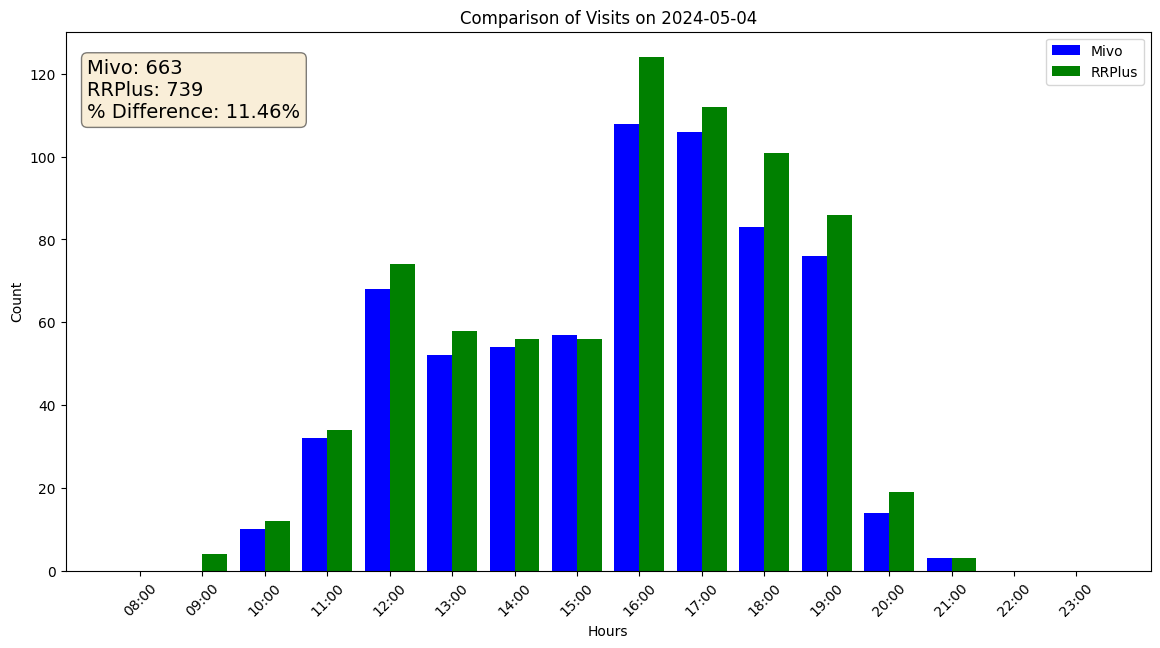

In [26]:
# df_panoramico = pd.read_excel('/home/diego/Downloads/Flujo_20240501_20240513.xls', skiprows=4)
# df_panoramico['FECHA'] = pd.to_datetime(df_panoramico['FECHA'], format='%Y-%m-%d')
# df_panoramico['store_id'] = 3
# df_panoramico.head()



# Load the Excel file
excel_file = '/home/diego/Downloads/Flujo_20240501_20240513.xls'
df_excel = pd.read_excel(excel_file, skiprows=4)
df_excel['FECHA'] = pd.to_datetime(df_excel['FECHA'], format='%Y-%m-%d')
df_excel['store_id'] = 3


connection = pymysql.connect(host=HOST, user=ADMIN, password=PASS, database=DB)
sql = "SELECT * FROM mivo.visits where store_id = 3 and date >= '2024-05-01' order by id desc;"
df_sql = pd.read_sql(sql, connection)
df_sql.head()

df_sql['date'] = pd.to_datetime(df_sql['date'], format='%Y-%m-%d')
df_sql['time'] = pd.to_timedelta(df_sql['time'])


# df_sql.to_csv('df_sql.csv')
# df_excel.to_csv('df_excel.csv')

# Extract the relevant data from the Excel dataframe
def extract_hourly_counts(df, date):
    hourly_counts = df[df['FECHA'] == date].iloc[:, 2:26].sum(axis=0)
    hourly_counts.index = pd.to_datetime(hourly_counts.index, format='%H').time
    return hourly_counts

# Prepare the data for plotting
def prepare_plot_data(df_sql, df_excel, date):
    sql_counts = df_sql[df_sql['date'] == date]
    sql_counts['hour'] = sql_counts['time'].dt.components['hours']
    sql_counts = sql_counts.set_index('hour').reindex(range(8, 24), fill_value=0)['count']
    
    excel_counts = extract_hourly_counts(df_excel, date)
    
    # Align excel counts to the hours range
    excel_counts = excel_counts.reindex(pd.to_datetime(range(8, 24), format='%H').time, fill_value=0)
    
    return sql_counts, excel_counts

# Plot the data
def plot_data(sql_counts, excel_counts, date):
    fig, ax = plt.subplots(figsize=(14, 7))
    x_labels = [f"{hour:02d}:00" for hour in range(8, 24)]
    
    ax.bar(range(len(sql_counts)), sql_counts, width=0.4, label='Mivo', color='blue', align='center')
    ax.bar([i + 0.4 for i in range(len(excel_counts))], excel_counts, width=0.4, label='RRPlus', color='green', align='center')
    
    ax.set_xticks([i + 0.2 for i in range(len(x_labels))])
    ax.set_xticklabels(x_labels, rotation=45)
    
    ax.set_xlabel('Hours')
    ax.set_ylabel('Count')
    ax.set_title(f'Comparison of Visits on {date.strftime("%Y-%m-%d")}')
    ax.legend()
    
        # Calculate and display total counts and percentage difference
    total_sql = sql_counts.sum()
    total_excel = excel_counts.sum()
    percentage_diff = ((total_excel - total_sql) / total_sql) * 100 if total_sql != 0 else 0
    
    textstr = f'Mivo: {total_sql}\nRRPlus: {total_excel}\n% Difference: {percentage_diff:.2f}%'
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    ax.text(0.02, 0.95, textstr, transform=ax.transAxes, fontsize=14, verticalalignment='top', bbox=props)
    
    plt.show()
    
    
    
    # Specify the date for comparison
comparison_date = pd.to_datetime('2024-05-09')

# Prepare the data for the specified date
sql_counts, excel_counts = prepare_plot_data(df_sql, df_excel, comparison_date)

# Plot the data
plot_data(sql_counts, excel_counts, comparison_date)

